# **Clasificaciones de revisiones de peliculas (IMDB)**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras import callbacks
from keras.utils import to_categorical
from __future__ import print_function
from math import ceil
from IPython.display import display
from keras.datasets import imdb
from sklearn import metrics
from keras import Sequential
from keras.layers import InputLayer, Dense

np.random.seed(42)
sns.set()

In [ ]:
def readIMDBData():
    #Just a gimmick to be able to read imdb data with this version of numpy
    ### ============
    np_load_old = np.load
    np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
    np.load = np_load_old
    return (x_train, y_train), (x_test, y_test)

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [ ]:
def model():
  model = Sequential()
  model.add(InputLayer((10000,)))
  model.add(Dense(512, activation="relu"))
  model.add(Dense(256, activation="relu"))
  model.add(Dense(1, activation="sigmoid"))
  model.summary()
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])
  return model

In [ ]:
def ploteo(hist):
  print(hist)
  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  sns.lineplot(data=hist.loc[:10, ['loss', 'val_loss']])
  plt.subplot(122)
  sns.lineplot(data=hist.loc[:30, ['binary_accuracy', 'val_binary_accuracy']]);

In [ ]:
def metricas(model,x_t,y_t,label):
  probabilities = model.predict(x_t)
  predictions = (probabilities > .5).astype(float)
  print(metrics.classification_report(y_t.ravel(), predictions.ravel()))
  c = metrics.confusion_matrix(y_t, predictions)
  r = c / c.sum(axis=1).reshape(-1, 1)
  plt.figure(figsize=(10, 8))
  ax = sns.heatmap(r, linewidths=.5, cmap='YlGnBu', annot=True, fmt='.1%', xticklabels=label, yticklabels=label);

In [ ]:
def main():
  (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
  labels = 'negative positive'.split()
  print("---------")
  print(x_train.shape, y_train.shape)
  print(x_test.shape, y_test.shape)
  print("---------")
  print(*x_train[:2], sep='\n\n')

  x_train = vectorize_sequences(x_train)
  x_test = vectorize_sequences(x_test)
  y_train = y_train.astype(float)
  y_test = y_test.astype(float)

  modelRN=model()

  epochs = 2 # 10 o 20, 30, 60, 70...
  batch_size = 512 # 0 128, 256, 1024, 2048...
  validation_split = .2

  modelo_hist = modelRN.fit(x_train, y_train,  epochs=epochs,  batch_size=batch_size, validation_split=validation_split, verbose=1)

  history_f = pd.DataFrame(modelRN.history.history)
  ploteo(history_f)
  metricas(modelRN,x_test,y_test,labels)


17464789/17464789 [==============================] - 1s 0us/step
---------
(25000,) (25000,)
(25000,) (25000,)
---------
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16

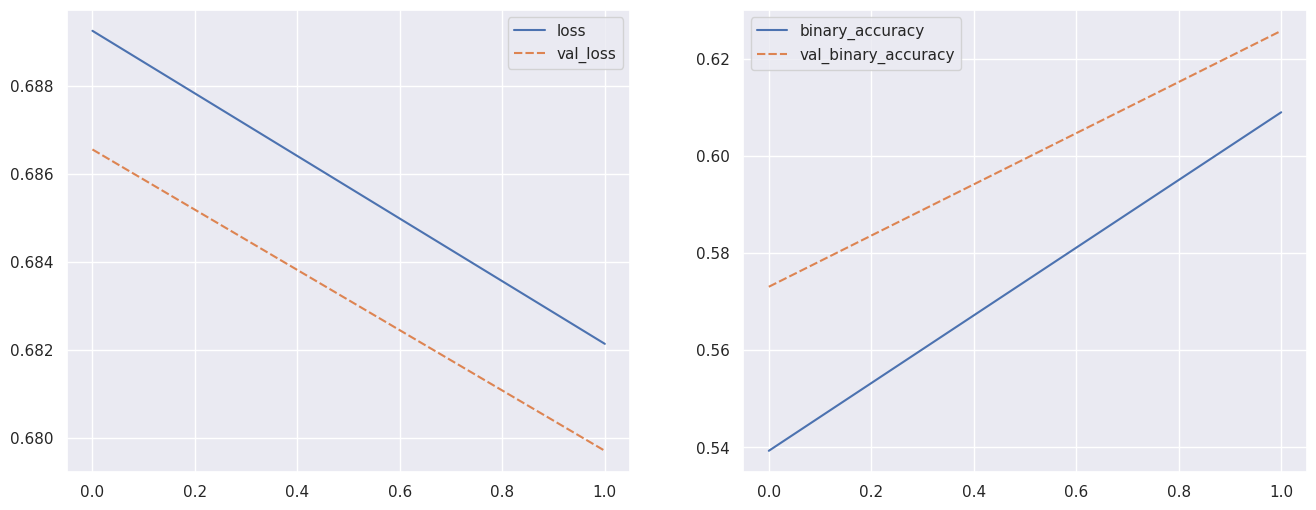

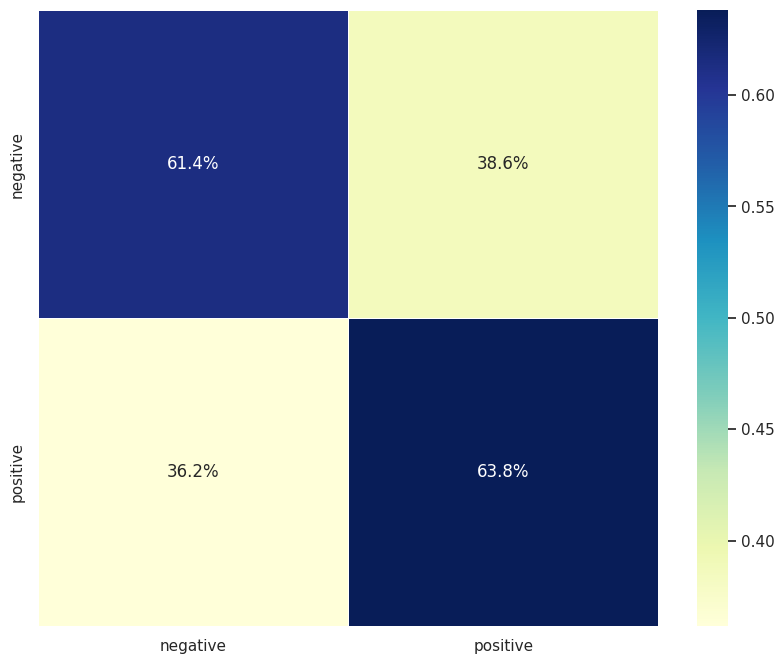

In [ ]:
main()